# Task 5 : Wine quality prediction

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None


In [2]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

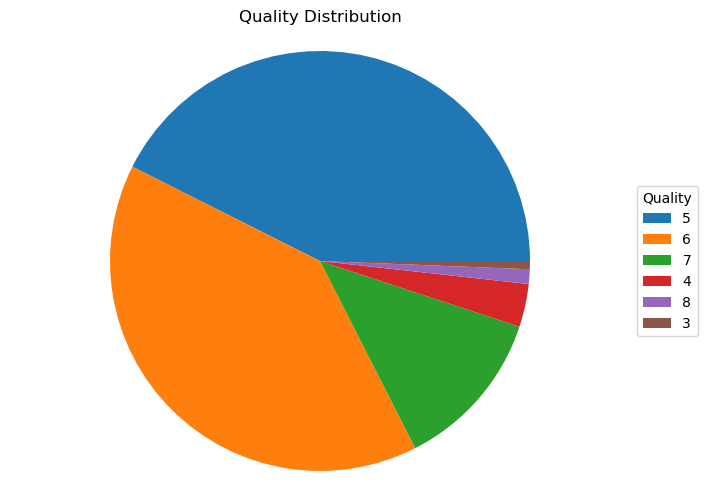

In [6]:
quality_counts = df['quality'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=None, autopct=None, startangle=0)
plt.axis('equal')  
plt.legend(quality_counts.index, title='Quality', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Quality Distribution")
plt.show()

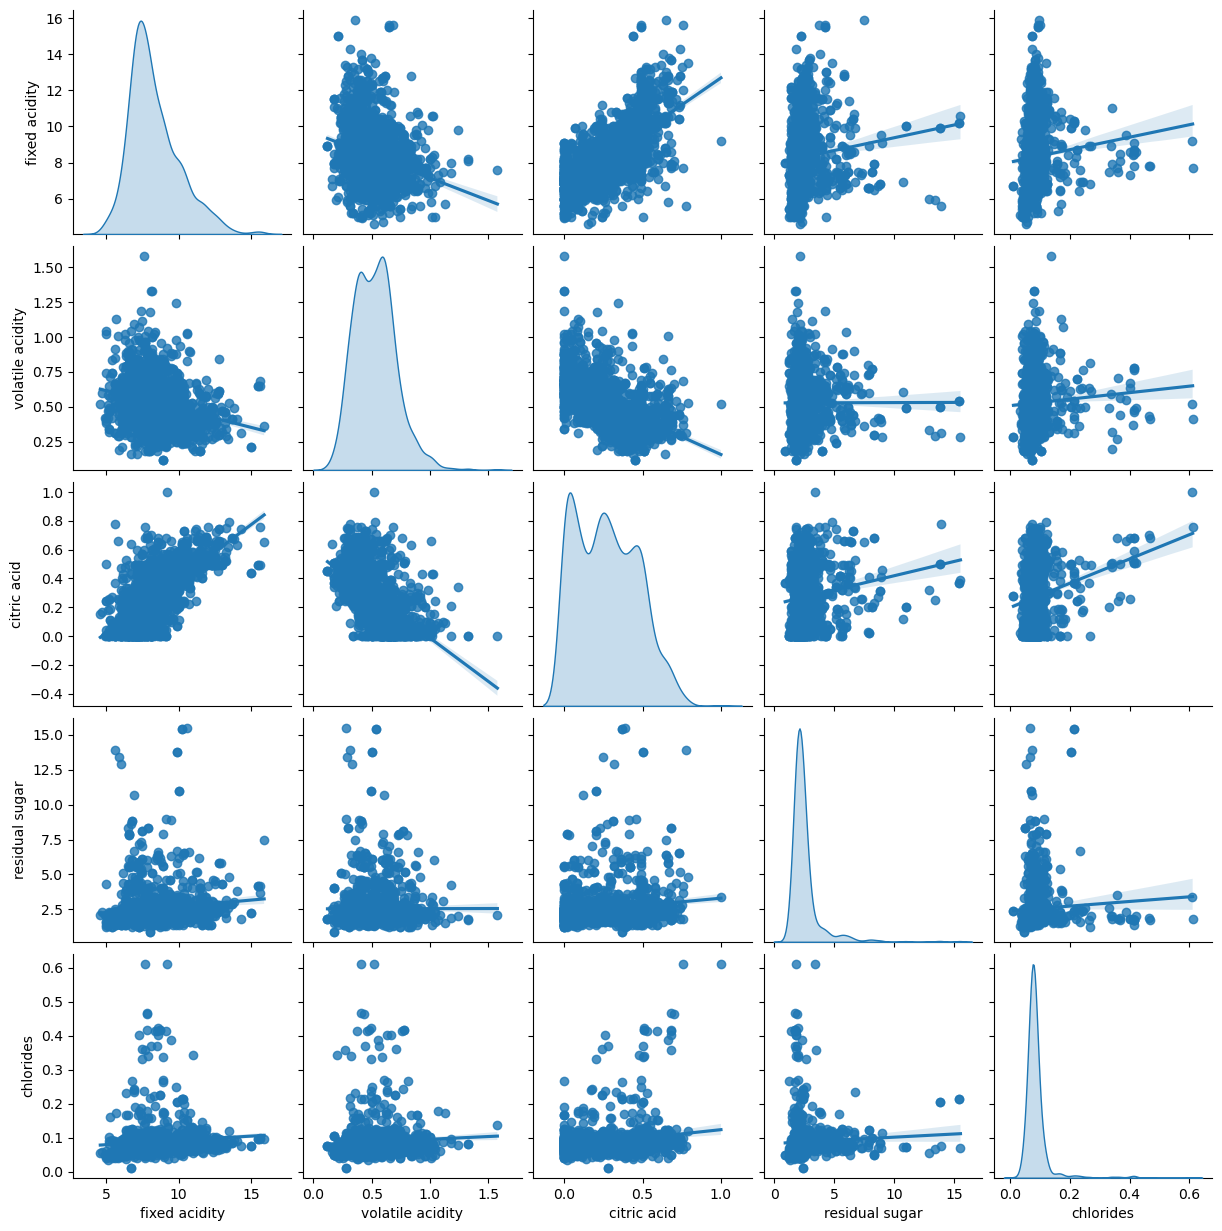

In [7]:
# Pairplot for selected features
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
sns.pairplot(df[selected_features], kind="reg",diag_kind ="kde")
plt.show()

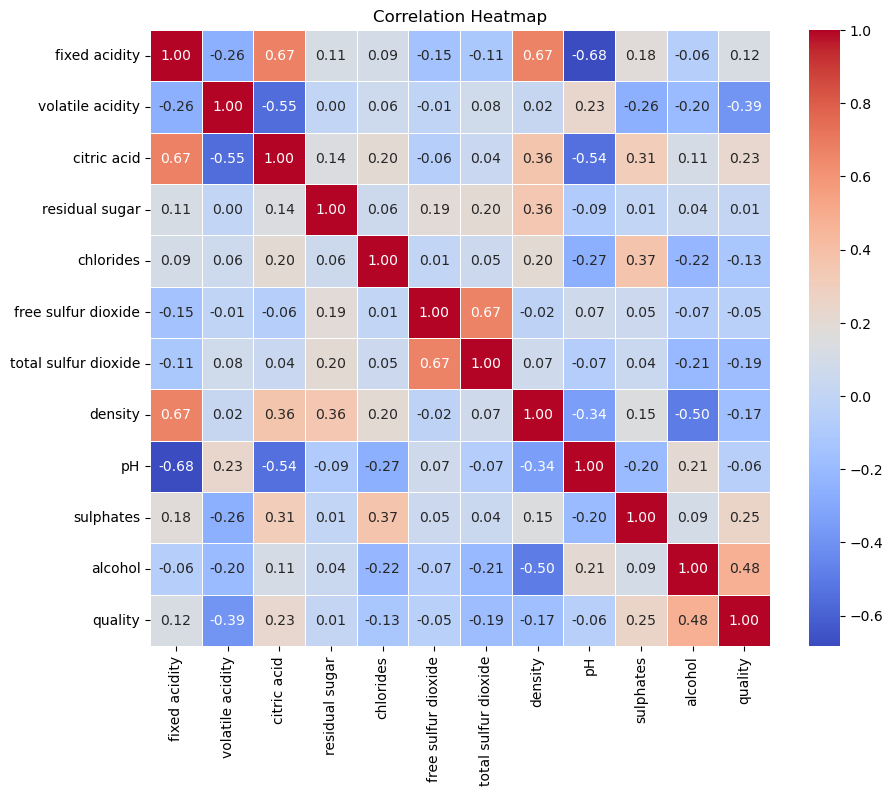

In [8]:
# Heatmap for correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## <u>Insights from the Correlation matrix :

* **Alcohol has the highest positive correlation with wine quality**, with a correlation coefficient of approximately 0.476. This means that as the alcohol content increases, the quality of the wine tends to be higher.

* **Volatile acidity has the highest negative correlation with wine quality**, with a correlation coefficient of approximately -0.391. This means that as the volatile acidity increases, the quality of the wine tends to be lower.

* **Density has a moderate negative correlation with wine quality**, with a correlation coefficient of approximately -0.175. This suggests that wines with higher density may have slightly lower quality.

* **Chlorides also have a moderate negative correlation with wine quality**, with a correlation coefficient of approximately -0.129. This indicates that higher chloride levels may lead to slightly lower wine quality.

* **Sulphates have a moderate positive correlation with wine quality**, with a correlation coefficient of approximately 0.251. This means that wines with higher sulphate levels tend to have slightly higher quality.

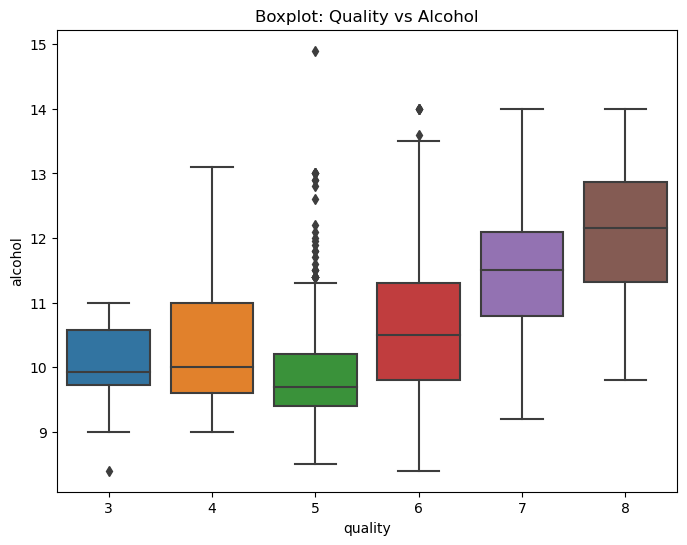

In [9]:
# Boxplot for quality vs alcohol
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Boxplot: Quality vs Alcohol")
plt.show()

In [10]:
cols = df.columns 
cols = cols.drop('quality')

## Skewness in the features

Excpet the pH and density, all features are right skewed and show Positive skewness

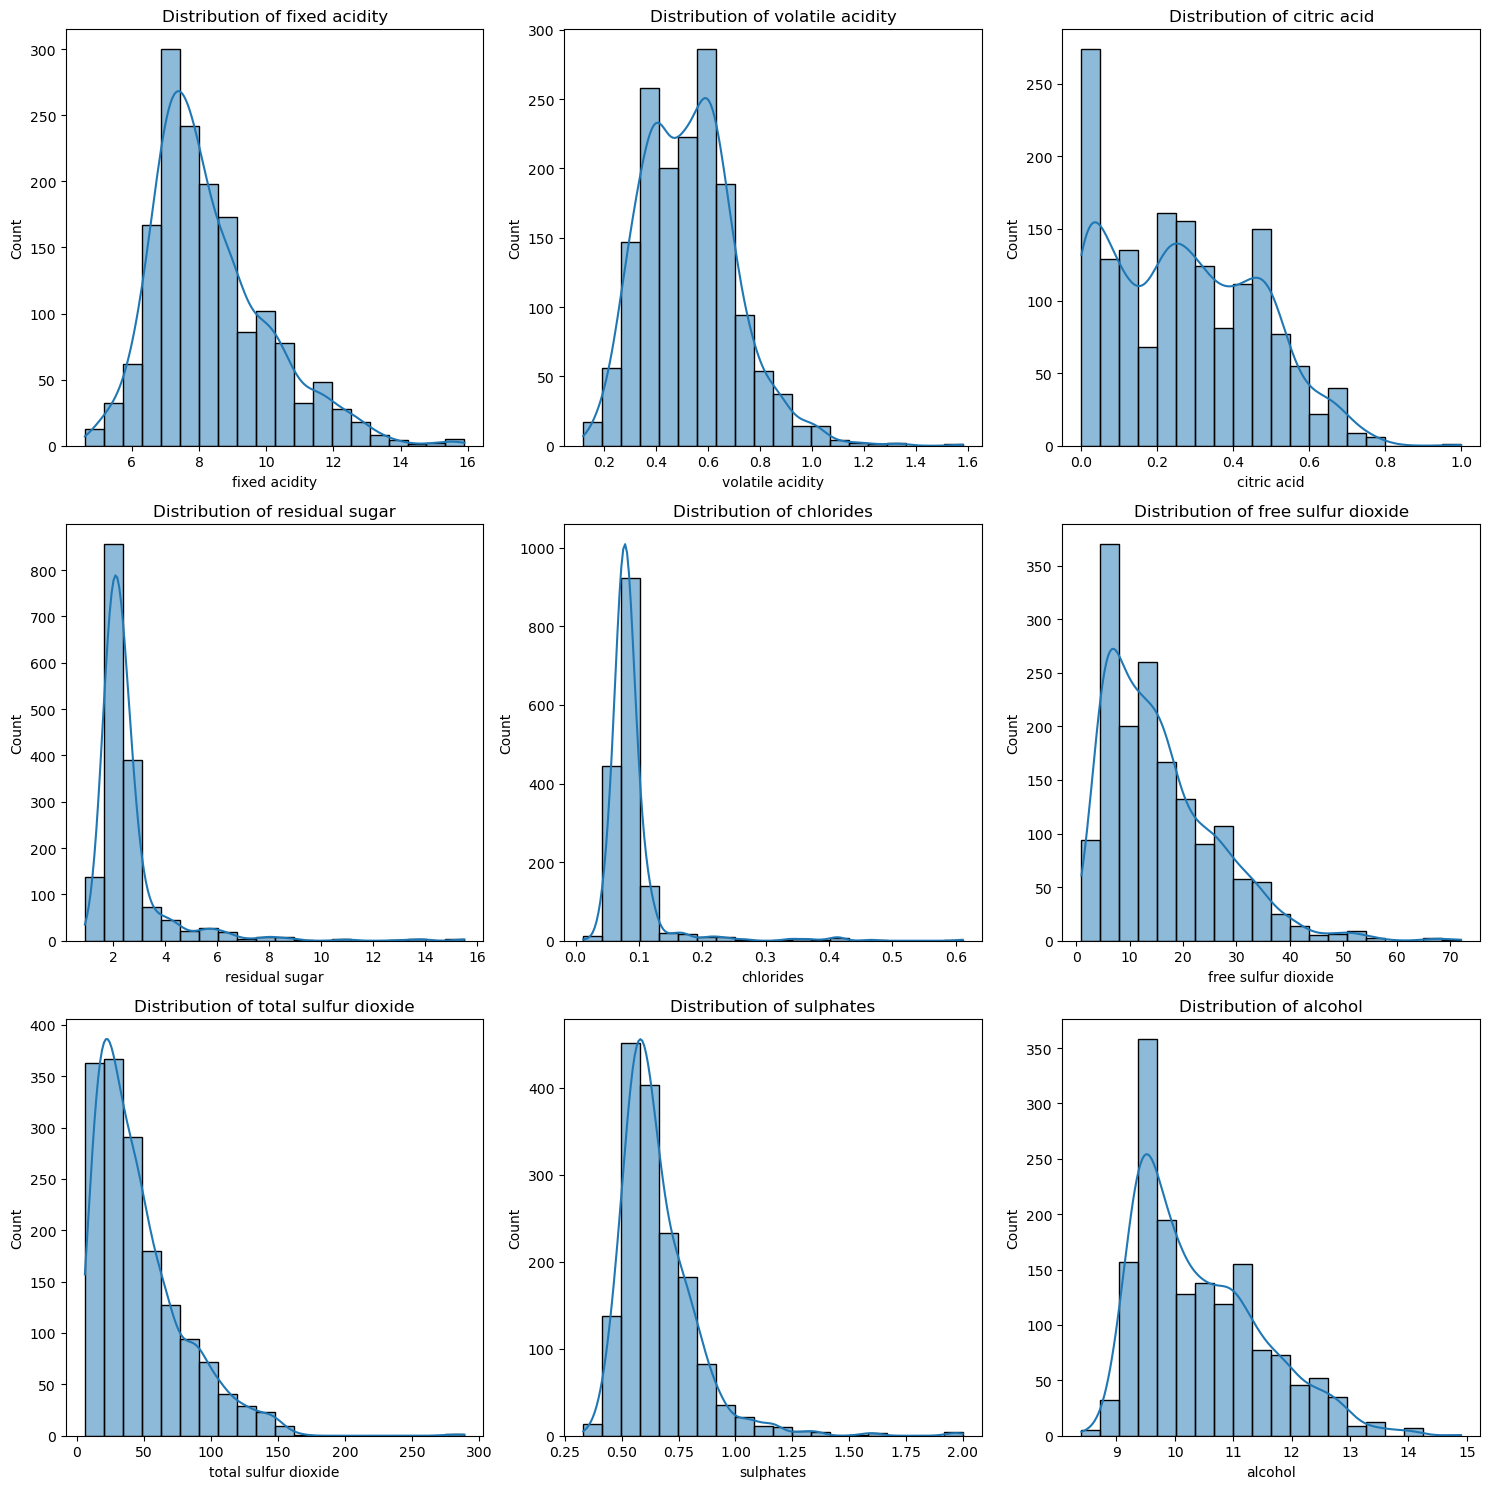

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
num_rows = (len(selected_columns) + 2) // 3  
num_cols = min(3, len(selected_columns))  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

for idx, col in enumerate(selected_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")

for i in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Log transformation works well for the right skewed data...

In [12]:
columns_to_exclude = ['quality', 'pH', 'density','citric acid']
selected_columns = df.drop(columns=columns_to_exclude).columns
df[selected_columns] = df[selected_columns].apply(np.log)

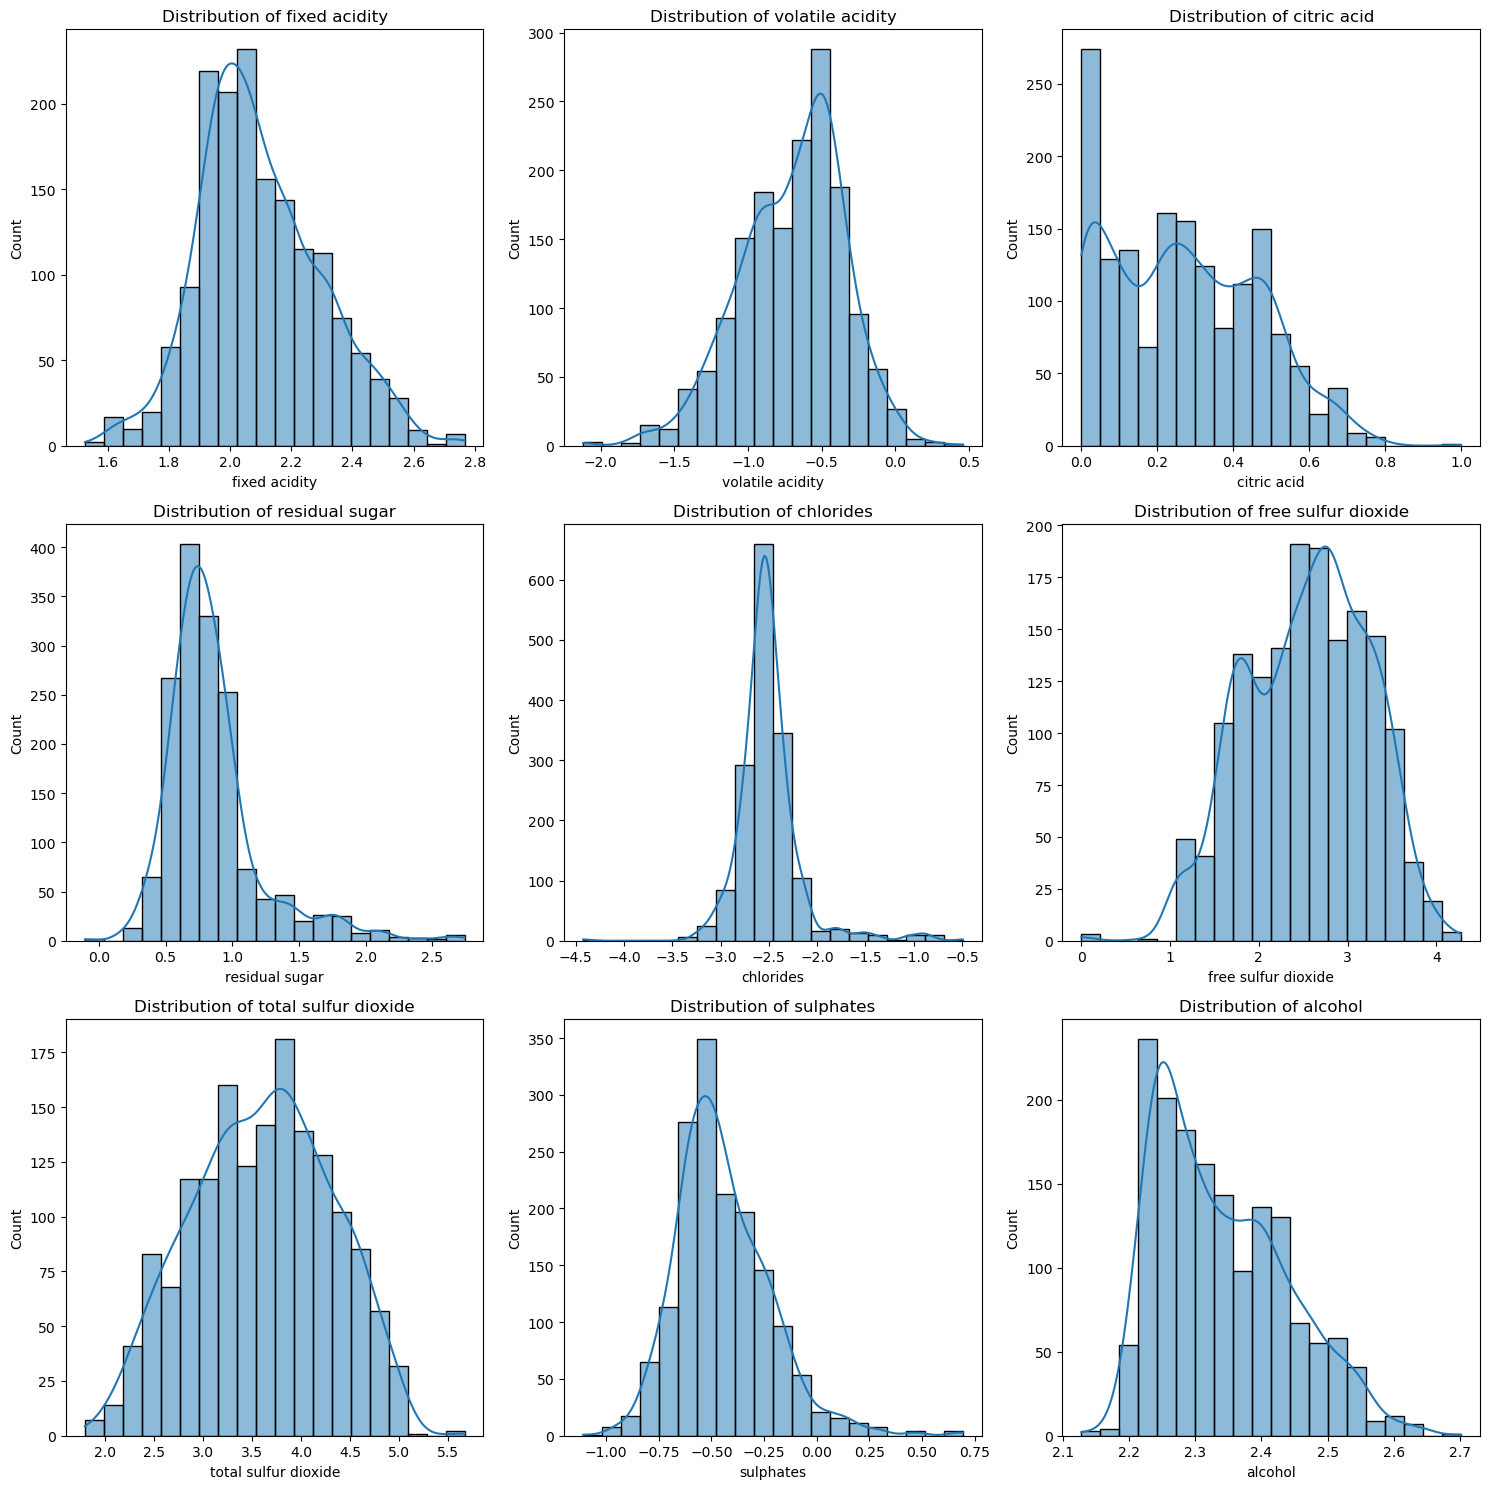

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

num_rows = (len(selected_columns) + 2) // 3  
num_cols = min(3, len(selected_columns))  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

for idx, col in enumerate(selected_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")

for i in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Rounded Regression - The Quality Predictions are assumed as Discrete values

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score
import pickle

# Define features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Round the predicted values to the nearest integer
    y_pred_rounded = y_pred.round()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_rounded)
    mae = mean_absolute_error(y_test, y_pred_rounded)
    medae = median_absolute_error(y_test, y_pred_rounded)
    r2 = r2_score(y_test, y_pred_rounded)
    evs = explained_variance_score(y_test, y_pred_rounded)

    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Median Absolute Error (MedAE): {medae:.3f}")
    print(f"R-squared (R2): {r2:.3f}")
    print(f"Explained Variance Score (EV): {evs:.3f}")
    print()

    # Pickle the model
    with open(f"{model_name}.pkl", "wb") as f:
        pickle.dump(model, f)

Linear Regression:
Mean Squared Error (MSE): 0.463
Mean Absolute Error (MAE): 0.438
Median Absolute Error (MedAE): 0.000
R-squared (R2): 0.292
Explained Variance Score (EV): 0.304

Lasso Regression:
Mean Squared Error (MSE): 0.753
Mean Absolute Error (MAE): 0.641
Median Absolute Error (MedAE): 1.000
R-squared (R2): -0.152
Explained Variance Score (EV): 0.000

Ridge Regression:
Mean Squared Error (MSE): 0.475
Mean Absolute Error (MAE): 0.438
Median Absolute Error (MedAE): 0.000
R-squared (R2): 0.273
Explained Variance Score (EV): 0.287

Decision Tree:
Mean Squared Error (MSE): 0.597
Mean Absolute Error (MAE): 0.459
Median Absolute Error (MedAE): 0.000
R-squared (R2): 0.087
Explained Variance Score (EV): 0.087

Random Forest:
Mean Squared Error (MSE): 0.403
Mean Absolute Error (MAE): 0.378
Median Absolute Error (MedAE): 0.000
R-squared (R2): 0.383
Explained Variance Score (EV): 0.385

Gradient Boosting:
Mean Squared Error (MSE): 0.506
Mean Absolute Error (MAE): 0.456
Median Absolute Erro

# Inferences :

* Random Forest performed well overall, as it achieved the **lowest Mean Squared Error (MSE), Mean Absolute Error (MAE), and Median Absolute Error (MedAE) among all the models**.

* Gradient Boosting and Support Vector Machine (SVM) also performed relatively well, showing relatively lower MSE, MAE, and MedAE compared to other models.

* Linear Regression and Ridge Regression have similar performance, indicating that regularization with Ridge Regression did not significantly improve the model's performance in this case.

* Lasso Regression performed worse compared to other models, as it has the highest MSE, MAE, and MedAE. The negative R-squared (R2) value indicates that the model performs worse than a simple mean model.

* Decision Tree and K-Nearest Neighbors (KNN) also performed relatively worse compared to other models, with higher MSE, MAE, and MedAE.

* The Explained Variance Score (EV) is relatively low for all models, suggesting that the models explain a limited portion of the variance in the target variable.

# Predictions

In [39]:
import pickle

with open('Random Forest.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

i = 1
test_data_point = X_test.iloc[[i]]

predicted_quality = random_forest_model.predict(test_data_point)
print(f"Predicted Quality for {i} test data point : {predicted_quality[0]}")

actual_quality = y_test.iloc[i]
print(f"Actual Quality for {i} test data point : {actual_quality}")


Predicted Quality for 1 test data point : 5.22
Actual Quality for 1 test data point : 5
